#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

##Loading data

*   Dataset: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets/data



In [4]:
fake_df = pd.read_csv('/content/News_data/Fake_news.csv')
true_df = pd.read_csv('/content/News_data/True_news.csv')

In [5]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake_df['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

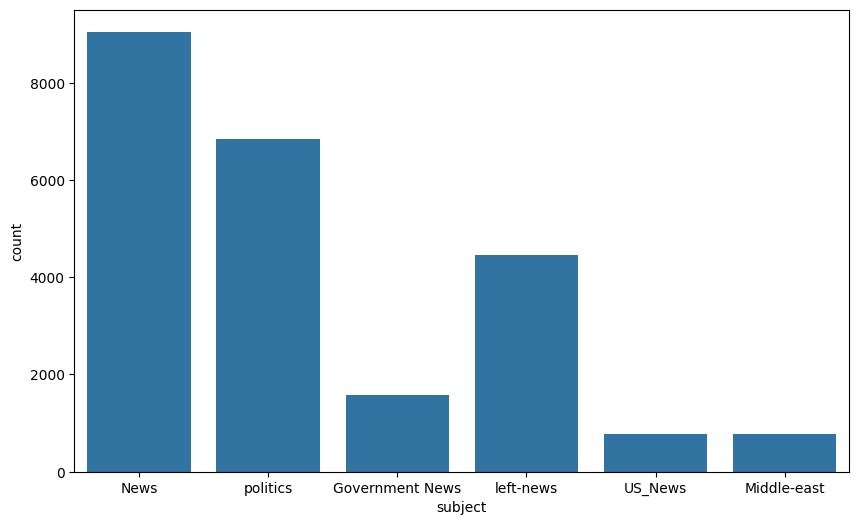

In [7]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'subject',data = fake_df)
plt.show()

In [8]:
text = ' '.join(fake_df['text'].tolist())

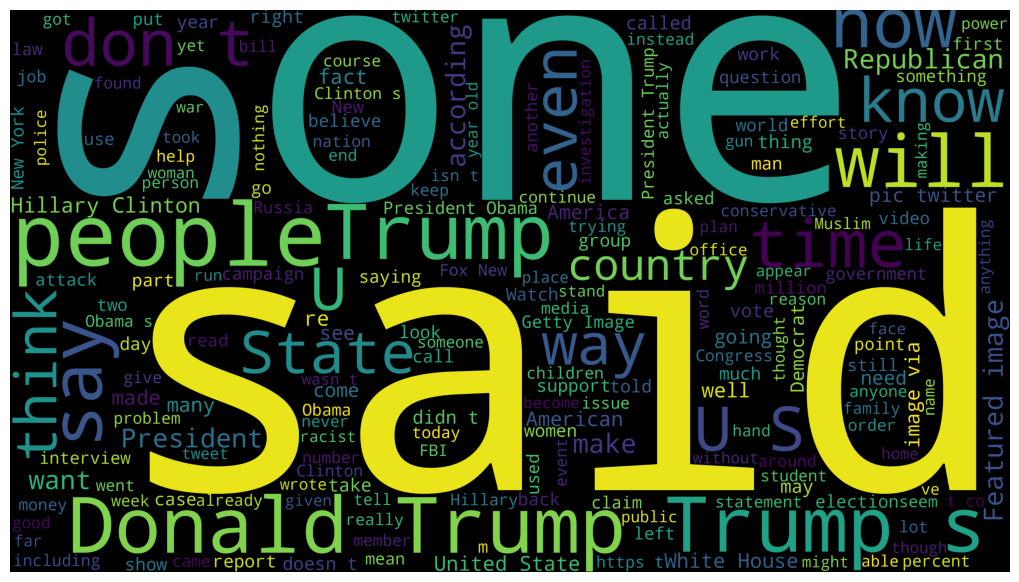

In [9]:
wordcloud = WordCloud(width = 3840,height = 2160).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [10]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
t_text = ' '.join(true_df['text'].tolist())

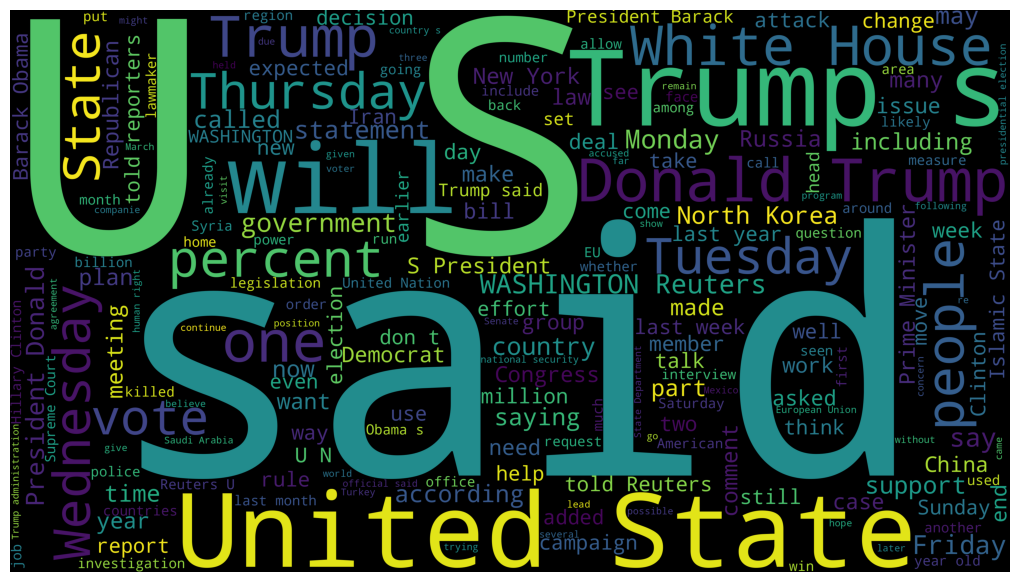

In [12]:
wordcloud = WordCloud(width = 3840,height = 2160).generate(t_text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

##Preprocessing

In [13]:
unknown_pub = []

for index,row in enumerate(true_df.text.values):
  try:
    rec = row.split('-',maxsplit = 1)
    rec[1]

    assert(len(rec[0]) < 120)

  except:
    unknown_pub.append(index)

In [14]:
len(unknown_pub)

222

In [15]:
true_df.iloc[unknown_pub]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [16]:
[index for index,text in enumerate(true_df.text.tolist()) if str(text).strip() == ""]

[8970]

In [17]:
true_df.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [18]:
true_df = true_df.drop(8970,axis = 0)

In [19]:
publisher = []
temp_text = []

for index,row in enumerate(true_df.text.values):
  if index in unknown_pub:
    temp_text.append(row)
    publisher.append('Unknown')
  else:
    rec = row.split('-',maxsplit = 1)
    publisher.append(rec[0].strip())
    temp_text.append(rec[1].strip())


In [20]:
true_df['publisher'] = publisher
true_df['text'] = temp_text

In [21]:
true_df.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [22]:
true_df.shape

(21416, 5)

In [23]:
empty_fake_index = [index for index,text in enumerate(fake_df.text.tolist()) if str(text).strip() == ""]

In [24]:
fake_df.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [25]:
true_df['text'] = true_df['title'] + " " + true_df['text']
fake_df['text'] = fake_df['title'] + " " + fake_df['text']

In [26]:
true_df['text'] = true_df['text'].apply(lambda x: str(x).lower())
fake_df['text'] = fake_df['text'].apply(lambda x: str(x).lower())

In [27]:
true_df['class'] = 1
fake_df['class'] = 0

In [28]:
true_df.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [29]:
real = true_df[['text','class']]
fake = fake_df[['text','class']]

In [30]:
df = pd.concat([real, fake], ignore_index=True)

In [31]:
df.sample(5)

,text,class
19094,"factbox: conservative, liberal, progressive: m...",1
23914,tapper slams trump for bizarre behavior at ‘w...,0
26301,anti-gay pastor who cheered killing of pulse ...,0
5825,u.s. senate panel postpones hearing for labor ...,1
9058,man arrested at trump rally said he wanted to ...,1


##Some text preprocessing

*   Special characters
*   Word Embedding



In [32]:
def remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

In [33]:
df['text'] = df['text'].apply(lambda x: remove_special_chars(x))

##Word2Vec

In [34]:
import gensim

In [35]:
y = df['class'].values

In [36]:
X = [d.split() for d in df['text'].tolist()]

In [37]:
num_rows = len(X)
num_columns = len(X[0])

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 44897
Number of columns: 753


In [38]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [39]:
Dim = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=Dim, window=10, min_count=1)

In [40]:
len(w2v_model.wv.key_to_index)

231872

In [41]:
w2v_model.wv['trump']

array([ 0.6048675 , -1.7915684 , -5.0345154 ,  0.33415234, -2.4521601 ,
       -3.586536  , -1.7493511 , -4.857383  , -0.7938073 ,  1.1917727 ,
        3.0098264 , -2.6645937 , -0.11654057,  0.56135905,  4.9232574 ,
        8.362638  ,  3.049573  ,  0.03637796, -1.3797907 ,  2.014322  ,
       -0.04761058,  3.1526456 ,  1.9927107 ,  5.114446  , -0.61889994,
        4.8149834 , -2.17413   , -1.4118007 ,  2.6909611 ,  1.2564019 ,
        4.5769253 ,  1.5416797 ,  1.8957596 , -2.2937064 , -1.4501998 ,
       -2.05269   , -8.345774  ,  2.2976608 , -4.4533653 , -0.62447304,
        0.61943233, -1.7043034 , -2.2471585 , -1.0173905 , -2.971457  ,
       -3.17668   , -1.4645829 ,  1.9202461 ,  4.421606  , -1.6932096 ,
       -1.7837576 ,  1.6095479 , -1.3296394 ,  1.0215518 ,  1.6147088 ,
       -2.4941204 ,  1.4102411 ,  0.7935553 ,  1.6413583 ,  1.890114  ,
       -4.1212125 ,  2.8238485 , -0.65513456,  0.26787186,  1.0667669 ,
       -0.5316418 ,  1.6219137 , -1.7441531 ,  1.4908329 ,  0.91

In [42]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7423964142799377),
 ('malaysia', 0.6707465648651123),
 ('indian', 0.6432015299797058),
 ('china', 0.6366242170333862),
 ('australia', 0.6200471520423889),
 ('thailand', 0.6152914762496948),
 ('modi', 0.5930247902870178),
 ('nucleararmed', 0.5871574282646179),
 ('norway', 0.5848602652549744),
 ('indonesia', 0.5844707489013672)]

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [44]:
X = tokenizer.texts_to_sequences(X)

In [45]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

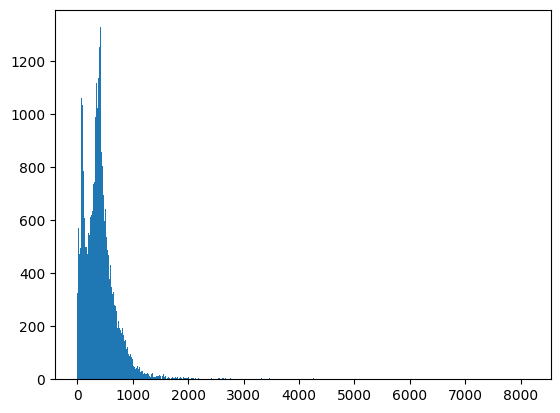

In [46]:
plt.hist([len(x) for x in X],bins = 700)
plt.show()

In [47]:
nos = np.array([len(x) for x in X])

In [48]:
len(nos[nos>1000])

1581

In [49]:
maxlen = 1000
X = pad_sequences(X,maxlen = maxlen)

In [50]:
len(X[0])

1000

In [51]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [52]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size,Dim))

  for word,i in vocab.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix

In [53]:
embedding_vectors = get_weight_matrix(w2v_model)

In [54]:
embedding_vectors.shape

(231873, 100)

## LSTM model

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 37)

In [56]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=Dim, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23187300  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23304677 (88.90 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23187300 (88.45 MB)
_________________________________________________________________


In [60]:
model.fit(x_train,y_train,validation_split = 0.3,epochs = 7)

Epoch 1/7
737/737 [==============================] - 1244s 2s/step - loss: 0.1380 - accuracy: 0.9505 - val_loss: 0.0804 - val_accuracy: 0.9757
Epoch 2/7
737/737 [==============================] - 1053s 1s/step - loss: 0.0570 - accuracy: 0.9811 - val_loss: 0.0823 - val_accuracy: 0.9697
Epoch 3/7
737/737 [==============================] - 1054s 1s/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0443 - val_accuracy: 0.9846
Epoch 4/7
737/737 [==============================] - 1056s 1s/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0252 - val_accuracy: 0.9926
Epoch 5/7
737/737 [==============================] - 1112s 2s/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 6/7
737/737 [==============================] - 1116s 2s/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0236 - val_accuracy: 0.9936
Epoch 7/7
737/737 [==============================] - 1058s 1s/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0242 - val_accuracy: 0.9931

In [61]:
y_pred = (model.predict(x_test) >= 0.5).astype(int)

351/351 [==============================] - 162s 458ms/step


In [62]:
accuracy_score(y_test,y_pred)

0.9944766146993318

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5862
           1       0.99      1.00      0.99      5363

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [64]:
x = ['this summer it will not be hot as last summers']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen = maxlen)

In [65]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 191ms/step


array([[0]])

In [66]:
x = ['Prime Minister Narendra Modi visited the Arichal Munai, the point from where the Ram Setu was built, near Dhanushkodi in Tamil Nadu on Sunday morning, a day ahead of the pran-pratishtha ceremony of Ram Lalla idol in Ayodhya. Modi practiced at Arichal Munai Point']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen = maxlen)

In [67]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 214ms/step


array([[1]])

##Saving the model


In [68]:
from google.colab import drive

drive.mount('/content/drive')
model.save('/content/drive/MyDrive/news_classifier_lstm.h5')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
